In [9]:
# ---
# title: Summary File Plot Test (ReaxKit)
# description: Demonstration of parsing and plotting data from summary.txt using ReaxKit.
# ---

# ## Step 0: Imports
# - `SummaryHandler` loads and parses ReaxFF summary.txt files.
# - `summary_analyzer` provides helper functions for analysis or plotting preparation.
# - `matplotlib` is used for simple data visualization.

from reaxkit.io.summary_handler import SummaryHandler
from reaxkit.analysis import summary_analyzer as sa
import matplotlib.pyplot as plt
from pathlib import Path


In [10]:
# ## Step 1: Load summary.txt
# The summary file typically contains per-iteration quantities such as:
#   - Energies (E)
#   - Temperatures (T)
#   - Pressures (P)
#   - Total charge, etc.
# We'll parse it using SummaryHandler.

summary_path = Path("summary.txt")

if not summary_path.exists():
    raise FileNotFoundError(f"{summary_path.resolve()} not found. Please provide a valid file.")

# Initialize the handler
handler = SummaryHandler(str(summary_path))
print(f"[Done] Loaded {summary_path}")


[Done] Loaded summary.txt


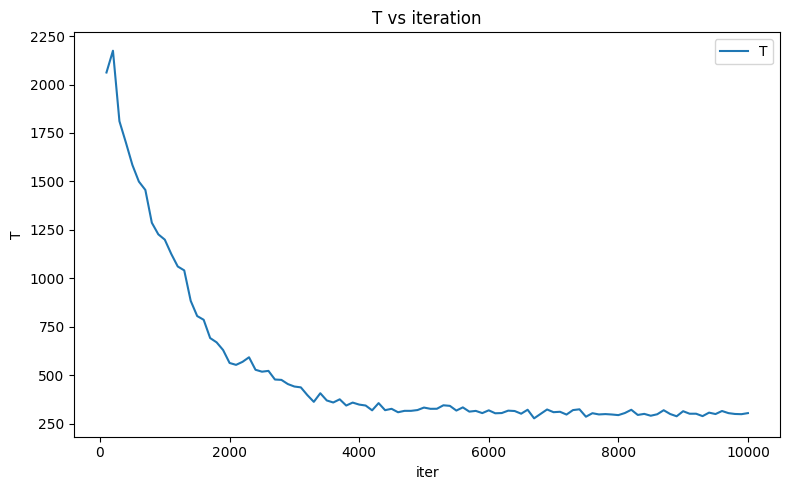

In [11]:
from reaxkit.io.summary_handler import SummaryHandler
from reaxkit.analysis import summary_analyzer as sa
import matplotlib.pyplot as plt

handler = SummaryHandler("summary.txt")

# Build X and Y using existing API
y = sa.get(handler, "T")   # energy (alias-aware)
df = handler.dataframe()

# Resolve iteration column or fallback to index
iter_col = None
for c in ("iteration", "iter", "step", "frame"):
    if c in map(str.lower, df.columns):
        # recover original-cased name
        iter_col = {c.lower(): c for c in df.columns}[c]
        break

x = df[iter_col] if iter_col else range(len(df))

plt.figure(figsize=(8, 5))
plt.plot(x, y, label="T")
plt.xlabel(iter_col or "iteration")
plt.ylabel("T")
plt.title("T vs iteration")
plt.legend()
plt.tight_layout()
plt.show()
